In [1]:
from DatasetGenerator import DatasetGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
dataset_generator = DatasetGenerator()

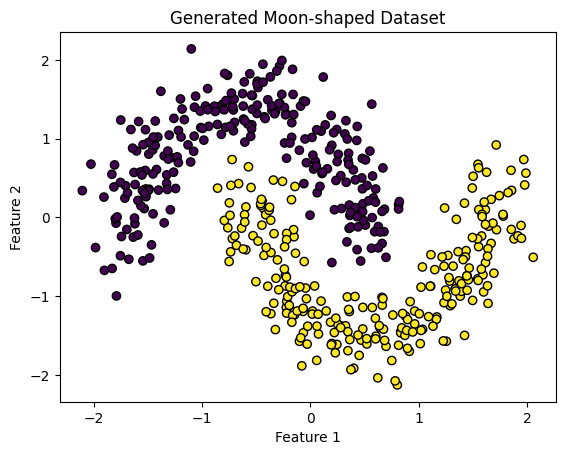

In [4]:
nonlinear_dataset = dataset_generator.get_nonlinear_dataset()
plt.scatter(nonlinear_dataset['Feature 1'], nonlinear_dataset['Feature 2'], c=nonlinear_dataset['Label'], cmap='viridis', marker='o', edgecolors='k')
plt.title("Generated Moon-shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
def plot_svm (clf, X_train, y_train, X_test, y_test):
    x0s = np.linspace(min(X_train[:,0])-0.5,max(X_train[:,0])+0.5, 100)
    x1s = np.linspace(min(X_train[:,1])-0.5,max(X_train[:,1])+0.5, 100)
    x0, x1 = np.meshgrid(x0s,x1s) 
    X_mesh = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = clf.predict(X_mesh).reshape(x0.shape) 
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figure(figsize=(16, 9)) 
    plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], s=80, c="g", label="Class 0")
    plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], s=80, c="b", label="Class 1")
    plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], s=80, c="g")
    plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], s=80, c="b")

    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")

    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")
    plt.grid(True, which='both')
    plt.xlabel("x1")
    plt.ylabel("x2") 

In [6]:
def tune(model, params, X_train, y_train):
    rnd_search = RandomizedSearchCV(model, param_distributions =params, n_iter = 50, cv = 5, random_state=40)
    rnd_search.fit(X_train, y_train)
    print("best hyper-parameter value: ", rnd_search.best_params_)
    best_model = rnd_search.best_estimator_
    return best_model

In [ ]:
X = np.array(nonlinear_dataset[['Feature1', 'Feature2']].values)
y = np.array(linear_dataset['Label'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
parameters={"C": uniform(0,20)}
best_model = tune(model, parameters, X_train, y_train)